In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_whisper_tiny = pd.read_csv('processed_evaluation/processed_Whisper_tiny_evaluation.csv', index_col=0)
df_cleaned_whisper_tiny = pd.read_csv('processed_evaluation/processed_Whisper_tiny_cleaned_evaluation.csv', index_col=0)
df_whisper_large = pd.read_csv('processed_evaluation/processed_Whisper_large_evaluation.csv', index_col=0)
df_cleaned_whisper_large = pd.read_csv('processed_evaluation/processed_Whisper_large_cleaned_evaluation.csv', index_col=0)
df_googlecloud = pd.read_csv('processed_evaluation/processed_GoogleCloud_evaluation.csv', index_col=0)
df_cleaned_googlecloud = pd.read_csv('processed_evaluation/processed_GoogleCloud_cleaned_evaluation.csv', index_col=0)
df_wav2vec = pd.read_csv('processed_evaluation/processed_Wav2vec_evaluation.csv', index_col=0)
df_cleaned_wav2vec = pd.read_csv('processed_evaluation/processed_Wav2vec_cleaned_evaluation.csv', index_col=0)
df_wenet = pd.read_csv('processed_evaluation/processed_WeNet_evaluation.csv', index_col=0)
df_cleaned_wenet = pd.read_csv('processed_evaluation/processed_WeNet_cleaned_evaluation.csv', index_col=0)
df_azure = pd.read_csv('processed_evaluation/processed_Azure_evaluation.csv', index_col=0)
df_cleaned_azure = pd.read_csv('processed_evaluation/processed_Azure_cleaned_evaluation.csv', index_col=0)

modelnames = ['Whisper_tiny', 'Whisper_large', 'GoogleCloud', 'Wav2vec', 'WeNet', 'Azure']
eval_metrics = ['WER', 'CER', 'BLEU', 'WordNet_first', 'WordNet_all', 'GloVe', 'BERT', 'Sent2Vec']
dfs = [df_whisper_tiny, df_whisper_large, df_googlecloud, df_wav2vec, df_wenet, df_azure]
dfs_cleaned = [df_cleaned_whisper_tiny, df_cleaned_whisper_large, df_cleaned_googlecloud, df_cleaned_wav2vec, df_cleaned_wenet, df_cleaned_azure]

In [3]:
nums_nan = []
nums_nan_cleaned = []
print('number of NaN values from transcription')
print('_______________________________________')
for df, df_cleaned, modelname in zip(dfs, dfs_cleaned, modelnames):
    num_nan = df[modelname].isna().sum()
    nums_nan.append(num_nan)
    print(f'{modelname}:', num_nan)
    num_nan_cleaned = df_cleaned[f'{modelname}_cleaned'].isna().sum()
    nums_nan_cleaned.append(num_nan_cleaned)
    print(f'{modelname}_cleaned:', num_nan_cleaned)


number of NaN values from transcription
_______________________________________
Whisper_tiny: 340
Whisper_tiny_cleaned: 1036
Whisper_large: 7
Whisper_large_cleaned: 93
GoogleCloud: 1360
GoogleCloud_cleaned: 1491
Wav2vec: 589
Wav2vec_cleaned: 589
WeNet: 100
WeNet_cleaned: 100
Azure: 470
Azure_cleaned: 531


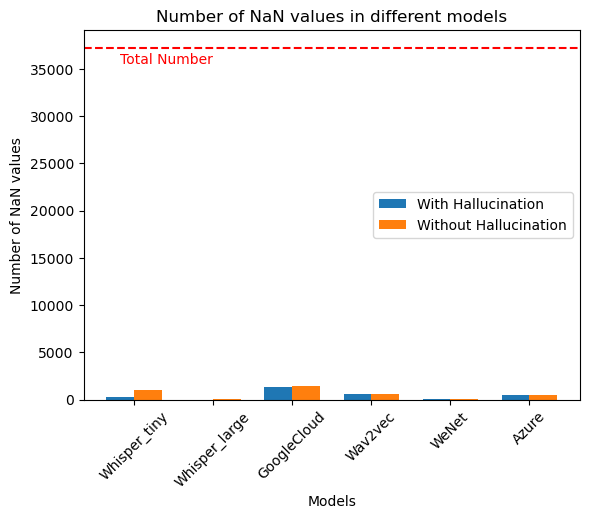

In [4]:
n = len(modelnames)
total_n = df_whisper_tiny['Whisper_tiny'].shape[0]

fig, ax = plt.subplots()
bar_width = 0.35

ax.bar(range(n), nums_nan, bar_width, label='With Hallucination')
ax.bar([p + bar_width for p in range(n)], nums_nan_cleaned, bar_width, label='Without Hallucination')
ax.axhline(y=total_n, color='r', linestyle='--')
ax.text(0, total_n-500, 'Total Number', color='r', va='top')

ax.set_xlabel('Models')
ax.set_ylabel('Number of NaN values')
ax.set_title('Number of NaN values in different models')
ax.set_xticks([p + bar_width / 2 for p in range(n)])
ax.set_xticklabels(modelnames)
ax.legend(loc=7)
plt.xticks(rotation=45)
plt.show()

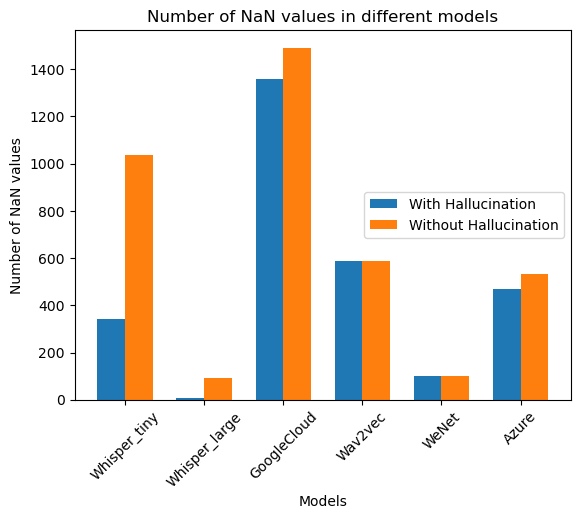

In [5]:
n = len(modelnames)
total_n = df_whisper_tiny['Whisper_tiny'].shape[0]

fig, ax = plt.subplots()
bar_width = 0.35

ax.bar(range(n), nums_nan, bar_width, label='With Hallucination')
ax.bar([p + bar_width for p in range(n)], nums_nan_cleaned, bar_width, label='Without Hallucination')
# ax.axhline(y=total_n, color='r', linestyle='--')
# ax.text(0, total_n-500, 'Total Number', color='r', va='top')

ax.set_xlabel('Models')
ax.set_ylabel('Number of NaN values')
ax.set_title('Number of NaN values in different models')
ax.set_xticks([p + bar_width / 2 for p in range(n)])
ax.set_xticklabels(modelnames)
ax.legend(loc=7)
plt.xticks(rotation=45)
plt.show()